In [34]:
# Assignment 2 - KNN Classifier
#Brian Conway
#Worked on alone this time

In [35]:
%matplotlib inline

#Q1. What is the purpose of the %matplotlib inline command?
Answer: The inline command enables inline plotting, so that graphs and plots will be displayed neatly below the cell in Jupyter Notebook.

In [36]:
#Q2. import iris dataset Use load_iris function from sklearn.datasets module
#display data
#Some needed imports, and loading the iris dataset in as 'data'
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

data=load_iris()
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
#Q3. Display the type of iris data
#just the built in python type() command
type(data)

sklearn.utils.Bunch

In [38]:
#Q4. print details of dataset. 
#use the DESCR function of sklearn to print details
data.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [39]:
#Q5: Display the samples in iris data 
#This is just printing the data itself
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [40]:
#Q6. Print the following: feature names, targets and target names
#all data.field
print(data.feature_names)
print(data.target)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [41]:
#Q7. Display the types of the features and response
#perhaps data was a bad name for our iris information cuz now we have to use the type function on data.data
print(type(data.data))

<class 'numpy.ndarray'>


### Checking the Sample and Target Sizes

In [42]:
#Q8. Disply number of samples and features in the datase
#(first dimension = number of observations, second dimensions = number of features)
#data.target is the number classified samples, len() on that will be the number of observations
#len() of feature_names is logically the number of features
print('Number of observations:')
print(len(data.target))
print('Number of features:')
print(len(data.feature_names))

Number of observations:
150
Number of features:
4


In [43]:
#Q9. Dispay number of target values(response)
#len() of target names, in other words
print(len(data.target_names))

3


### Splitting the Data for Training and Testing 

In [44]:
#Q10: Prepare data by splitting into Training and Testing (70% Training and 30% Testing)
#test train split, a well known line of code
x,y=data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

### Training and Testing Set Sizes

In [45]:
#Q11: Display Training and Testing Set Sizes
#two more prints of the len() function
print(len(y_train))
print(len(y_test))

105
45


### Creating the Model 

In [46]:
#Q12: Use KNeighborsClassifier estimator to create the model 
model=KNeighborsClassifier()



### Training the Model 

In [47]:
#Q13: Train the model
#model.fit on the training data 
model.fit(X=X_train, y=y_train)


KNeighborsClassifier()

### Predicting Digit Classes 

In [48]:
#Q14: Report your prodictions
#model.predict on the X_test data, remember y_test is the actual results
predicted=model.predict(X_test)
print(predicted)
#go ahead and set the expected, actual values to the y_test cuz we'll use it in a bit.
expected=y_test

[2 1 0 0 2 2 1 1 2 1 2 0 1 1 0 2 2 1 2 1 1 2 2 2 1 1 1 0 2 0 1 0 0 1 1 1 2
 0 2 0 2 0 2 1 2]


In [49]:
#print(//complete this code)

### Estimator Method `score`

In [81]:
#Q15: Print the score
accuracy= metrics.accuracy_score(predicted,expected)
print(accuracy)

0.9333333333333333


### Confusion Matrix

In [51]:
#Q16: Print confusion matrix
from sklearn.metrics import confusion_matrix
#import the confusion matrix and print it
confusion=confusion_matrix(predicted, expected)
confusion


array([[11,  0,  0],
       [ 0, 16,  1],
       [ 0,  2, 15]], dtype=int64)

### Classification Report

In [52]:
#Q17: report classification
from sklearn.metrics import classification_report

#Calling another function from the sklearnmetrics library
print(classification_report(expected, predicted, target_names=data.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.89      0.91        18
   virginica       0.88      0.94      0.91        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



### Visualizing the Confusion Matrix

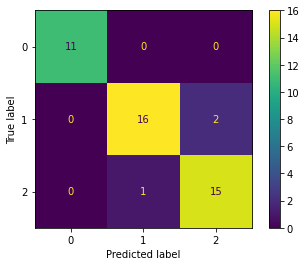

In [53]:
#Q18: Visualize confusion matrix
from sklearn.metrics import plot_confusion_matrix

#output the confusion matrix but this time as a heat map
#I'm a little mesmerized by  the colors
plot_confusion_matrix(model, X_test, y_test)  


### K-Fold Cross-Validation (KFold object) and cross_val_score

In [54]:
#Q19: Perform K-Fold Cross-validation with different k values. 
from sklearn.model_selection import KFold #module for doing kFold

#kfold, with 10 splits, a random state of the answer to everything, and shuffled
kFold= KFold(n_splits=10, random_state=42, shuffle=True)

In [58]:
from sklearn.model_selection import cross_val_score

#Score of each cross fold validation, essentially 10 more training using the entire data set for testing and training
scores= cross_val_score(estimator=model, X=data.data, y=data.target, cv=kFold)
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.93333333, 0.86666667, 1.        , 1.        , 0.93333333])

### Hyperparameter Tuning 

In [69]:
#Q20: What is the best value of k that you would suggest? 
#Hint: Use a for loop to test different values of k

#kfold needs to start at at least 2 splits, cause logically it's not a split otherwise.
testVal=2
#list will populate with the accuracy values of the K folds
averages=[]

#while loop logic, testing k values [2,100] for the kfold
while(testVal<100):
    #run the kfold, called kfold2 just cuz second time we've done it this hw
    kFold2= KFold(n_splits=testVal, random_state=42, shuffle=True)
    #average the scores of the kfold of each k value
    scores= cross_val_score(estimator=model, X=data.data, y=data.target, cv=kFold2)
    avg= (sum(scores)/len(scores))
    #add the averages to the list
    averages.append(avg)
    #increment the k value for the kfolding
    testVal=testVal+1
#print the averages
print(averages)
#find the max of the averages
largest=max(averages)
#the index of that maximum average, plus 2 because we started at k=2, is the most accurate k value.
#averages[0] corrolates to a k value of 2 for instance
bestK=averages.index(largest)+2
print("The best, most accurate K value for this set is " +str(bestK))

[0.9466666666666667, 0.9666666666666667, 0.966394025604552, 0.9733333333333334, 0.9733333333333333, 0.966295609152752, 0.9733187134502924, 0.9730392156862746, 0.9733333333333334, 0.9730269730269732, 0.9722222222222222, 0.9720279720279719, 0.9733766233766233, 0.9733333333333334, 0.9722222222222223, 0.9730392156862746, 0.9652777777777778, 0.9727443609022557, 0.9642857142857144, 0.9659863945578232, 0.972943722943723, 0.963768115942029, 0.9652777777777778, 0.9666666666666666, 0.9666666666666667, 0.9641975308641976, 0.9642857142857144, 0.9655172413793105, 0.9666666666666668, 0.9661290322580646, 0.9671875000000001, 0.9636363636363636, 0.9632352941176471, 0.9642857142857143, 0.9652777777777778, 0.9662162162162162, 0.9649122807017543, 0.9658119658119657, 0.9666666666666666, 0.9674796747967479, 0.9642857142857143, 0.9612403100775194, 0.9621212121212122, 0.962962962962963, 0.963768115942029, 0.9645390070921986, 0.9652777777777778, 0.965986394557823, 0.9666666666666666, 0.9640522875816993, 0.9647

### Choosing the Best Estimator - For Graduate Students only

In [73]:
#Q20: Compare knn, SVC(gamma='scale'), and GaussianNB() and display the prediction accuracies.
#knn has already has its accuracy calculated, so only need to run the other 2.

from sklearn.svm import LinearSVC #Linear support vector classification I presume? question not 100% clear

#Need to use the same train_test_split from earlier
#Just need to make a new classifier

SVCclassifier= LinearSVC()
SVCclassifier.fit(X_train,y_train)
SVCpredictions= SVCclassifier.predict(X_test)
SVCaccuracy= metrics.accuracy_score(y_test, SVCpredictions)


C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9555555555555556

In [80]:
from sklearn.naive_bayes import GaussianNB  # Gaussian naive Bayes classifier
from sklearn.preprocessing import LabelEncoder

GNBclassifier = GaussianNB()
GNBclassifier.fit(X_train,y_train)
GNBpredictions=GNBclassifier.predict(X_test)
GNBaccuracy=metrics.accuracy_score(y_test, GNBpredictions)
GNBaccuracy


0.9777777777777777

The Gaussian naive Bayes classifier is the most accurate estimator for this dataset. Will likely not scale up well however, as a lazy learner like knn will take less system resources, especially if a large k value for k fold cross validation.